In [2]:
import mysql.connector
import pandas as pd

mydb = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="",
    database="db_ade"
)

df = pd.read_sql("""SELECT nama AS Nama,nip AS NIP, jk.jenis_kelamin AS Jenis_Kelamin, a.agama AS Agama, g.golongan AS Golongan, u.nama_unor AS Unit_Organisasi, pd.tingkat_pendidikan AS Pendidikan, sp.status_pegawai AS Status_Pegawai FROM pegawai p
                    JOIN ref_jk jk ON p.id_jk = jk.id_jk
                    JOIN ref_agama a ON p.id_agama = a.id_agama
                    JOIN ref_golongan g ON p.id_golongan = g.id_golongan
                    JOIN ref_unor u ON p.id_unor = u.id_unor
                    JOIN ref_pendidikan pd ON p.id_pendidikan = pd.id_pendidikan
                    JOIN ref_status_pegawai sp ON p.id_status_pegawai = sp.id_status_pegawai """, mydb)



C:\Users\bagus\AppData\Local\Temp\ipykernel_22576\3311875138.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""SELECT nama AS Nama,nip AS NIP, jk.jenis_kelamin AS Jenis_Kelamin, a.agama AS Agama, g.golongan AS Golongan, u.nama_unor AS Unit_Organisasi, pd.tingkat_pendidikan AS Pendidikan, sp.status_pegawai AS Status_Pegawai FROM pegawai p


In [3]:
print(df.count())

Nama               10001
NIP                10001
Jenis_Kelamin      10001
Agama              10001
Golongan           10001
Unit_Organisasi    10001
Pendidikan         10001
Status_Pegawai     10001
dtype: int64


In [4]:
df

,Nama,NIP,Jenis_Kelamin,Agama,Golongan,Unit_Organisasi,Pendidikan,Status_Pegawai
0,Irnanto Manullang,1533352270,PRIA,Islam,II,Unor C,S1,PPNPN
1,Harto Waluyo,6202779563,PRIA,Kristen,I,Unor E,S2,PPNPN
2,Kawaya Mangunsong,8734968609,PRIA,Islam,I,Unor B,S3,PPNPN
3,Kunthara Firgantoro,2852826214,PRIA,Islam,IV,Unor B,SMP,PPNPN
4,Raihan Winarno,1549863616,PRIA,Hindu,III,Unor C,SMP,PPNPN
...,...,...,...,...,...,...,...,...
9996,Puspa Puspita,4289991412,WANITA,Islam,IV,Unor B,SD,CPNS
9997,Widya Andriani,7813267461,WANITA,Islam,III,Unor E,SMP,CPNS
9998,Maida Pertiwi,6225798090,WANITA,Islam,I,Unor E,SMA,CPNS
9999,Gina Yolanda,4112385619,WANITA,Islam,IV,Unor B,SMP,CPNS


In [5]:
import matplotlib.pyplot as plt

In [6]:
jk_count = df['Jenis_Kelamin'].value_counts()
jk_count

PRIA      5719
WANITA    4282
Name: Jenis_Kelamin, dtype: int64

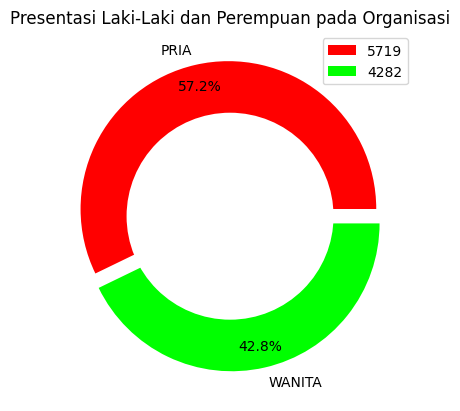

In [7]:
colors = ['#FF0000', '#00FF00']
# explosion
explode = (0.05, 0.05)
 
# Pie Chart
plt.pie(jk_count, colors=colors, labels=df['Jenis_Kelamin'].unique(),
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Presentasi Laki-Laki dan Perempuan pada Organisasi')
plt.legend(jk_count, loc="upper right")
 
# Displaying Chart
plt.show()

In [10]:
import plotly.express as px

In [11]:
fig = px.histogram(df['Pendidikan'], x="Pendidikan", color="Pendidikan")
fig.update_layout(title={
    'text':'Tingkat_Pendidikan',
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'
})
fig.show()

In [12]:
def listToString(s):
    str1 = ", "
    return (str1.join(s))

In [13]:
stringed_golongan = listToString(df['Golongan'])
stringed_golongan

'II, I, I, IV, III, II, II, IV, III, III, II, IV, IV, III, I, IV, III, I, II, IV, II, II, II, I, II, II, III, II, I, III, IV, II, II, III, II, I, IV, I, IV, II, II, I, III, IV, III, III, IV, II, III, IV, III, II, IV, III, IV, IV, IV, III, III, IV, II, III, I, I, IV, III, II, II, II, I, II, II, IV, IV, III, II, II, II, IV, II, III, II, IV, I, II, I, II, II, IV, II, II, II, IV, II, II, II, IV, III, III, IV, IV, IV, IV, II, I, II, IV, IV, IV, II, IV, IV, IV, IV, III, II, III, IV, III, III, II, IV, III, III, IV, I, I, II, III, I, IV, III, II, II, III, IV, II, III, II, IV, IV, II, II, III, IV, III, IV, II, III, II, III, IV, IV, II, I, II, IV, IV, I, II, III, IV, III, I, IV, II, III, IV, III, III, II, IV, I, II, III, II, II, III, III, IV, II, III, IV, II, IV, I, III, I, II, II, IV, III, III, IV, III, III, IV, II, IV, II, IV, IV, III, III, II, IV, I, IV, IV, IV, III, II, I, IV, II, III, IV, II, III, IV, IV, III, II, IV, II, II, I, IV, IV, II, IV, IV, IV, IV, IV, II, II, III, III, II, III, IV,

In [14]:
from wordcloud import WordCloud

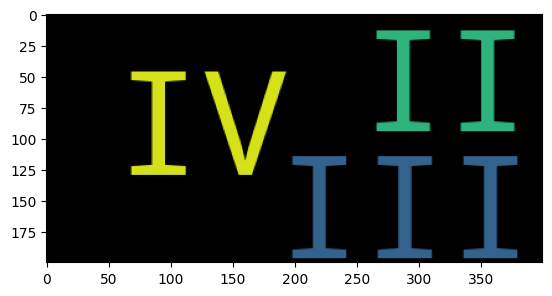

In [15]:
wc = WordCloud().generate(stringed_golongan)
plt.imshow(wc)

In [16]:
fig = px.histogram(df['Golongan'], x="Golongan", color="Golongan")
fig.update_layout(title={
    'text':'Pegawai berdasarkan golongan',
    'y':0.95,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'
})
fig.show()

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [18]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
status_pegawai_count = df["Status_Pegawai"].value_counts()
fig.add_trace(go.Pie(labels=df["Status_Pegawai"].unique(), values=status_pegawai_count, name="Status Kepegawaian"),
              1, 1)
fig.update_traces(hole=.6, hoverinfo="label+percent+name+value")
fig.update_layout(title={
    'text':'Status Pegawai',
    'y':0.5,
    'x':0.485,
    'xanchor': 'center',
    'yanchor': 'top'
})

In [26]:
x_unor = df["Unit_Organisasi"].unique()
y_unor = df["Unit_Organisasi"].value_counts()


fig = px.bar(df, x=y_unor, y=x_unor, color=x_unor, text_auto=True, orientation='h', title="Unit Organisasi Pegawai")
fig.show()



In [27]:
x_agama = df["Agama"].unique()
y_agama = df["Agama"].value_counts()


fig = px.bar(df, x=y_agama, y=x_agama, color=x_agama, text_auto=True, orientation='h', title="Agama")
fig.show()